In [1]:
import warnings
warnings.filterwarnings('ignore')
import logging
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S')

import tensorflow as tf
from matplotlib import pyplot as plt

In [45]:
import numpy as np

class CartesCoordinator:
  """
    Collection of utils for vector operation samples and exercise
  """
  def draw_coord(ax, xlim=(-5,5), ylim=(-5,5), tick_freq=1, aspect=1):
    xmin, xmax = xlim
    ymin, ymax = ylim

    ax.set(xlim=(xmin, xmax + tick_freq), ylim=(ymin, ymax + tick_freq), aspect=aspect)

    # Employ bottom, left spines as x,y axes
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    # Remove top, right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Set x,y label on axes
    ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
    ax.set_ylabel('y', size=14, labelpad=-24, y=1.03, rotation=0)

    x_ticks = np.arange(xmin, xmax+tick_freq, tick_freq)
    y_ticks = np.arange(ymin, ymax+tick_freq, tick_freq)

    # Draw major and minor grid lines
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])

    # Arrows for axes
    arrow_fmt = dict(markersize=4, color='black', clip_on=False)
    ax.plot(1, 0, marker='>', transform=ax.get_yaxis_transform(),**arrow_fmt)
    ax.plot(0, 1, marker='^', transform=ax.get_xaxis_transform(),**arrow_fmt)

class DerivativeVisualization:
  def draw_f(ax, f, func_name, x_lim, y_lim, delta=0.01, X_in=None, alpha=1, tick_freq=1):
    X = X_in if (X_in is not None) else tf.range(x_lim[0] - delta, x_lim[1] + delta, delta=delta)

    X = tf.boolean_mask(X, tf.less(f(X), y_lim[1] + tick_freq))
    Y = f(X)

    # Draw f(x)
    ax.plot(X, Y, '-', alpha=alpha)
    ax.text(X[-1] + 0.5, Y[-1] - 0.5, func_name, fontsize=15)


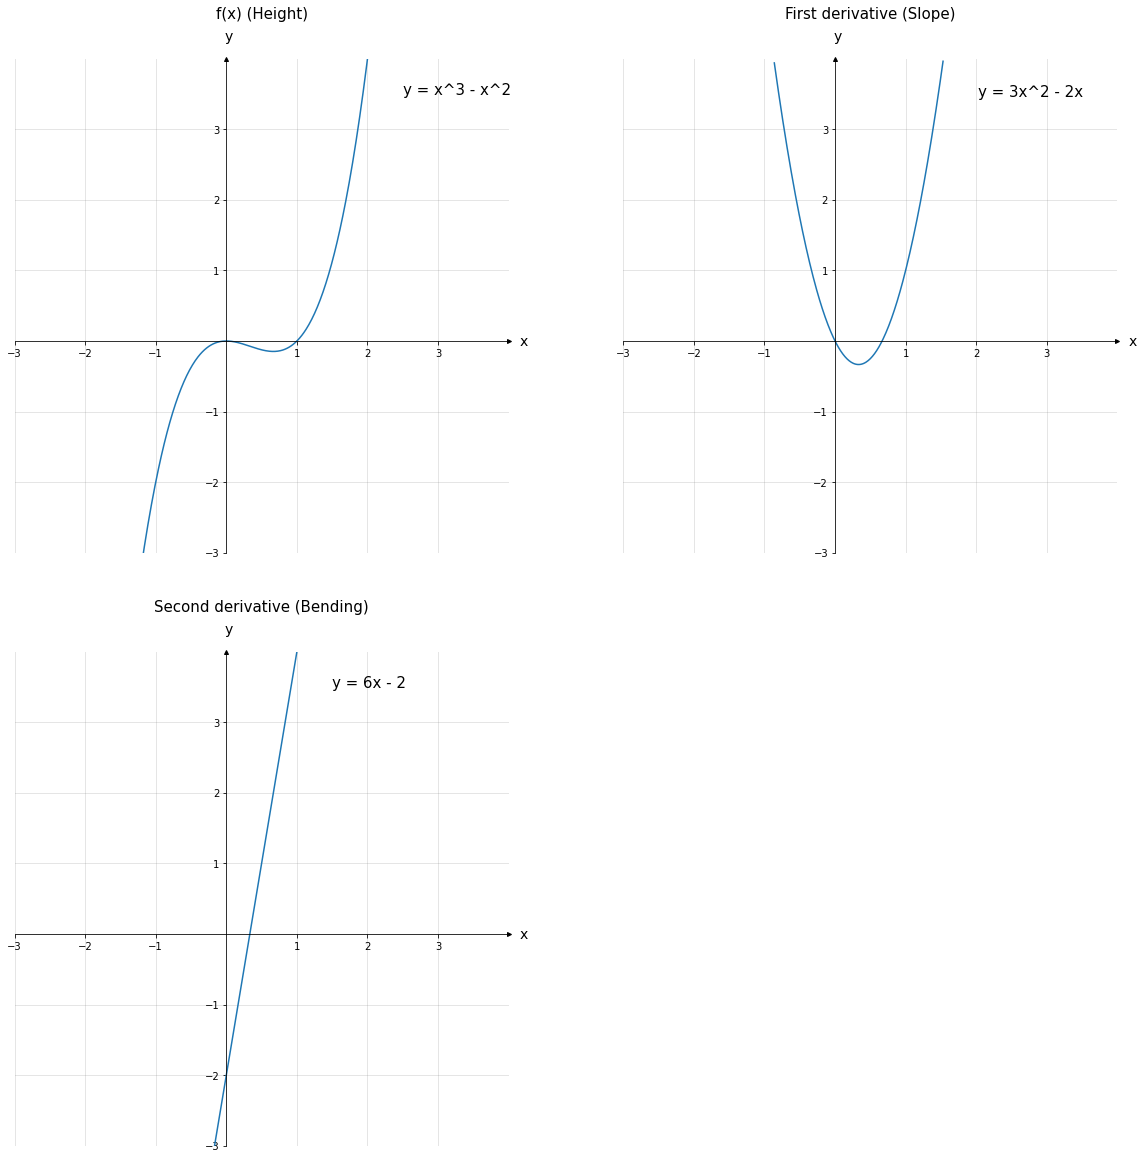

In [66]:
from matplotlib import ticker

tf.random.set_seed(32)

x_domain = (-3, 3)
y_domain = (-3, 3)
fig, ax = plt.subplots(2, 2,figsize=(20,20))

### f(x)
f = lambda x: (x**3 - x**2)

ax[0,0].set_title('f(x) (Height)', pad=40, size=15)
CartesCoordinator.draw_coord(ax[0,0], x_domain, y_domain, aspect=1)
DerivativeVisualization.draw_f(ax[0,0], f, 'y = x^3 - x^2', x_domain, y_domain)

### f'(x)
f = lambda x: (3*x**2 - 2*x)

ax[0,1].set_title('First derivative (Slope)', pad=40, size=15)
CartesCoordinator.draw_coord(ax[0,1], x_domain, y_domain, aspect=1)
DerivativeVisualization.draw_f(ax[0,1], f, 'y = 3x^2 - 2x', x_domain, y_domain)

### f''(x)
f = lambda x: (6*x - 2)

ax[1,0].set_title('Second derivative (Bending)', pad=40, size=15)
CartesCoordinator.draw_coord(ax[1,0], x_domain, y_domain, aspect=1)
DerivativeVisualization.draw_f(ax[1,0], f, 'y = 6x - 2', x_domain, y_domain)

fig.delaxes(ax[1,1])

plt.show()